# Aperiodic Activity

### Issue

Neural activity contains both periodic and aperiodic activity. Aperiodic activity is itself dynamics. 
This can be a confound for many analyses, as a measured changes at any particular frequency range could reflect a change or either periodic or aperiodic activity, and cannot be assumed to necessarily reflect changes in periodic activity. 

### Solution

Both periodic and aperiodic activity can be explicitly measured and compared, allowing for careful adjudication of which aspect of the data is changing. 

### Related Work

The following papers include discussion of this topic:
- [Scale-free brain activity: past, present, and future](https://doi.org/10.1016/j.tics.2014.04.003), He B., 2014
- [Simulated power spectral density (PSD) of background electrocorticogram (ECoG)](https://doi.org/10.1007/s11571-008-9064-y), Freeman & Zhai, 2009
- [Co-Increasing Neuronal Noise and Beta Power in the Developing Brain](https://doi.org/10.1101/839258), He W et al, preprint

### Related Discussion / Examples

- Conflating changes in periodic and aperiodic activity in the power spectrum
    - https://fooof-tools.github.io/fooof/auto_motivations/measurements/plot_PeriodicAperiodicFeatures.html
- Filtering aperiodic activity, with changes in aperiodic
    - https://fooof-tools.github.io/fooof/auto_motivations/concepts/plot_IfYouFilterTheyWillCome.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from fooof import Bands
from fooof.utils import trim_spectrum
from fooof.plts.spectra import plot_spectra_shading

from neurodsp.filt import filter_signal
from neurodsp.spectral import compute_spectrum, rotate_powerlaw
from neurodsp.sim import sim_powerlaw, sim_combined
from neurodsp.utils import create_times, set_random_seed
from neurodsp.plts.time_series import plot_time_series

In [1]:
# Add path and import custom code for the project
import sys
sys.path.append('code')
from utils import compute_abs_power, compute_rel_power
from plts import plot_bar, savefig

## Functions

In [3]:
def rotate_sig(sig, delta_exp, f_rotation):
    """..."""

    fft_vals = np.fft.fft(sig)
    f_axis = np.fft.fftfreq(len(sig), 1./fs)
    
    if f_axis[0] == 0:
        skipped_zero = True
        p_0 = fft_vals[0]
        f_axis, fft_vals = f_axis[1:], fft_vals[1:]

    else:
        skipped_zero = False
    
    f_mask = 10**(np.log10(np.abs(f_axis))*delta_exp)
    f_mask = f_mask / f_mask[np.where(f_axis==f_rotation)]

    fft_rot = fft_vals * f_mask
    
    if skipped_zero:
        fft_rot = np.insert(fft_rot, 0, p_0)

    sig_out = np.real(np.fft.ifft(fft_rot))
    
    return sig_out

In [4]:
def rotate_powerlaw_fft(freqs, fft, delta_exponent, f_rotation=1):
    """   """
    
    # ...
    delta_exponent = delta_exponent / 2
    
    if freqs[0] == 0:
        skipped_zero = True
        f_0, p_0 = freqs[0], fft[0]
        freqs, fft = freqs[1:], fft[1:]
    else:
        skipped_zero = False

    #mask = (np.abs(freqs) / f_rotation)**-delta_exponent
    mask = 10**(np.log10(np.abs(freqs))*f_rotation)
    rotated_fft = mask * fft

    if skipped_zero:
        freqs = np.insert(freqs, 0, f_0)
        rotated_fft = np.insert(rotated_fft, 0, p_0)

    return rotated_fft

In [5]:
# # TO SCRAP:

# #from scipy.stats import zscore
# def rotate_sig(sig, delta_exp, f_rotation):

#     fft_vals = np.fft.fft(sig)
#     f_axis = np.fft.fftfreq(len(sig), 1./fs)
    
#     if f_axis[0] == 0:
#         skipped_zero = True
#         p_0 = fft_vals[0]
#         f_axis, fft_vals = f_axis[1:], fft_vals[1:]

#     else:
#         skipped_zero = False
    
#     f_mask = 10**(np.log10(np.abs(f_axis))*delta_exp)
#     f_mask = f_mask / f_mask[np.where(f_axis==f_rotation)]
    
#     #f_mask[0] = 1.

#     fft_rot = fft_vals * f_mask
#     #fft_flat = fft_vals / f_mask
    
#     if skipped_zero:
#         fft_rot = np.insert(fft_rot, 0, p_0)
#         #fft_flat = np.insert(fft_flat, 0, p_0)

#     sig_out = np.real(np.fft.ifft(fft_rot))
    
#     return sig_out
    
#     #get back original sig:
#     #sig_rec = np.fft.ifft(fft_vals)
#     #get back steepened:

#     #get back flattened:
#     #sig_rec_flat = np.fft.ifft(fft_flat)
    
#     #sig_out = zscore(np.real(sig_rec_steep))

## Settings

In [7]:
import seaborn as sns
sns.set_context('poster')

In [8]:
# Set random seed
set_random_seed(808)

In [9]:
# Define general simulation settings
n_seconds = 50
fs = 1000

times = create_times(n_seconds, fs)

In [10]:
# Define parameters for the simulations
cf = 10
ap_filt = (1.5, 100)

exp1 = -1.0
exp2 = -2.0

In [11]:
# Define our bands of interest
bands = Bands({'delta' : [2, 4],
               'theta' : [4, 8],
               'alpha' : [8, 13],
               'beta' : [13, 30], 
               'gamma' : [30, 80]})

In [12]:
# Set frequency ranges of interest
alpha_range = (8, 12)
psd_range = [3, 50]

In [13]:
plt_kwargs = {'alpha' : [0.6, 0.6], 'xlabel' : '', 'ylabel' : ''}

In [14]:
alpha_color = '#1882d9'

In [15]:
colors = ['black', 'red']

In [16]:
c1 = '#0000ff'
c2 = '#00693a'

colors2 = [c1, c2]

In [17]:
shade_cols = ['#e8dc35', '#46b870', '#1882d9', '#a218d9', '#e60026']

## Simulate time series

....

In [18]:
# Define relative power of the signal components
comp_vars = [1, 0.6]

In [19]:
# # Collect parameters and set up simulations
# comps1 = {'sim_powerlaw' : {'exponent' : exp1, 'f_range' : ap_filt},
#           'sim_oscillation' : {'freq' : cf}}
# comps2 = {'sim_powerlaw' : {'exponent' : exp2, 'f_range' : ap_filt},
#           'sim_oscillation' : {'freq' : cf}}



In [20]:
# sig1 = sim_combined(n_seconds, fs, comps1, comp_vars)
# sig2 = sim_combined(n_seconds, fs, comps2, comp_vars)

In [21]:
# ...
comps = {'sim_powerlaw' : {'exponent' : exp1, 'f_range' : ap_filt},
         'sim_oscillation' : {'freq' : cf}}
sig = sim_combined(n_seconds, fs, comps, comp_vars)

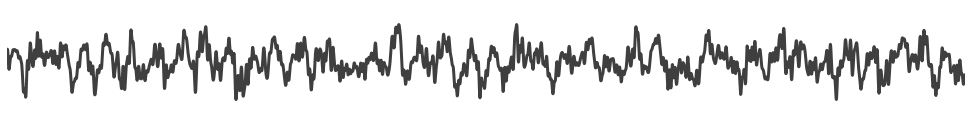

In [22]:
# ..
plot_time_series(times, sig, xlim=[0, 4], alpha=0.75)
plt.axis('off')
savefig(SAVE_FIG, '03-sig_noax')

## Compute power spectra

In [23]:
# freqs1, powers1 = trim_spectrum(*compute_spectrum(sig1, fs, nperseg=fs), psd_range)
# freqs2, powers2 = trim_spectrum(*compute_spectrum(sig2, fs, nperseg=fs), psd_range)

In [24]:
# plot_spectra_shading(freqs1, [powers1, powers2], alpha_range,
#                      log_freqs=False, log_powers=True,
#                      lw=4, shade_colors=alpha_color)

In [25]:
# FOR TESTING
from fooof import FOOOF
fm = FOOOF(verbose=False)

## Rotate Power Spectrum

In [26]:
exp_rot = -0.35
f_rotation = 25

In [27]:
sig_rot = rotate_sig(sig, exp_rot, f_rotation)

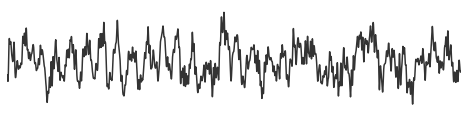

In [28]:
# Plot original signal
_, ax = plt.subplots(figsize=(8, 3))
plot_time_series(times, sig, xlim=[4, 7], colors='black', alpha=0.8, lw=1.5, ax=ax)
plt.xticks([]); plt.yticks([]); plt.axis('off');
savefig(SAVE_FIG, '03-ts_signal')

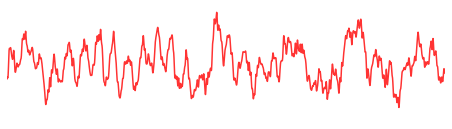

In [29]:
# Plot rotated signal
_, ax = plt.subplots(figsize=(8, 3))
plot_time_series(times, sig_rot, xlim=[4, 7], colors='red', alpha=0.8, lw=1.5, ax=ax)
plt.xticks([]); plt.yticks([]); plt.axis('off');
savefig(SAVE_FIG, '03-ts_signal_rot')

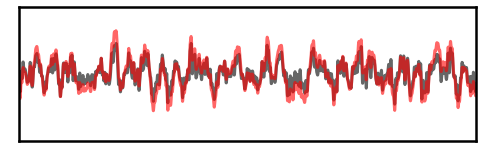

In [30]:
_, ax = plt.subplots(figsize=(8, 3))
plot_time_series(times, [sig, sig_rot], xlim=[1, 4], **plt_kwargs, ax=ax)
plt.xticks([]); plt.yticks([]);
savefig(SAVE_FIG, '03-ts_full')

In [31]:
sig_filt = filter_signal(sig, fs, 'bandpass', alpha_range)
sig_rot_filt = filter_signal(sig_rot, fs, 'bandpass', alpha_range)

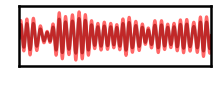

In [32]:
_, ax = plt.subplots(figsize=(4, 2))
plot_time_series(times, [sig_filt, sig_rot_filt],
                 xlim=[1, 4], ylim=[-2.15, 2.15],
                 **plt_kwargs, ax=ax)
plt.xticks([]); plt.yticks([]);
savefig(SAVE_FIG, '03-ts_filt')

In [33]:
np.nanmax(sig_filt)

1.7343948503302784

In [34]:
freqs1, powers1 = trim_spectrum(*compute_spectrum(sig, fs, nperseg=fs), psd_range)
freqs2, powers2 = trim_spectrum(*compute_spectrum(sig_rot, fs, nperseg=fs), psd_range)

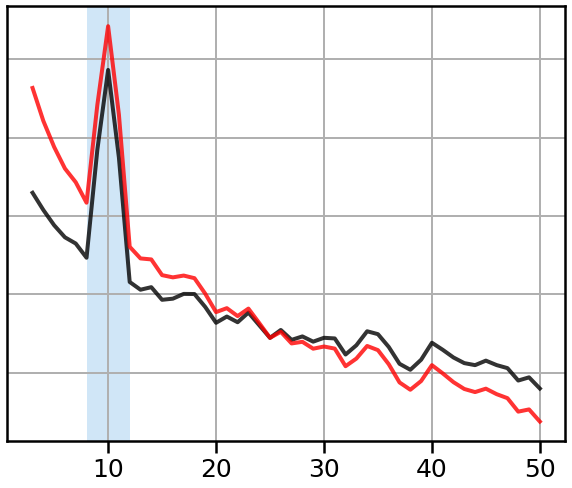

In [35]:
plot_spectra_shading(freqs1, [powers1, powers2], [8, 12],
                     log_freqs=False, log_powers=True,
                     lw=4, shade_colors=alpha_color)

# ADD STYLE SPECTRUM HELPER

ax = plt.gca()
for line, color in zip(plt.gca().get_lines(), colors):
    line.set_color(color)
    line.set_alpha(0.8)
    
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(25)
    
ax.set_xlabel(''); ax.set_ylabel('');
for xlabel_i in ax.get_yticklabels():
    xlabel_i.set_visible(False)
    xlabel_i.set_fontsize(0.0)
    
for tic in ax.yaxis.get_major_ticks():
    tic.tick1line.set_visible(False)
    
savefig(SAVE_FIG, '03-psd_osc')

In [36]:
fm.fit(freqs1, powers1, psd_range)
fm.aperiodic_params_[1]

0.9364141279093485

In [37]:
fm.fit(freqs1, powers2, psd_range)
fm.aperiodic_params_[1]

1.6471000387645416

In [38]:
####

In [39]:
sig_len = len(sig)

In [40]:
fft_out = np.fft.fft(sig)
freqs = np.fft.fftfreq(len(sig), 1./fs)

In [41]:
fft_rot_x = rotate_powerlaw(freqs, fft_out, exp_rot/2, f_rotation)
sig_rot_x = np.fft.ifft(fft_rot_x)

/Users/tom/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


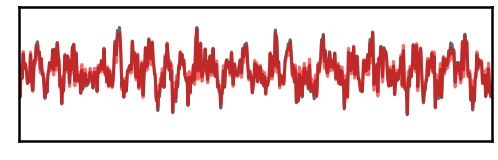

In [42]:
_, ax = plt.subplots(figsize=(8, 3))
plot_time_series(times, [sig, sig_rot_x], xlim=[1, 4], **plt_kwargs, ax=ax)
plt.xticks([]); plt.yticks([]);
savefig(SAVE_FIG, '03-ts_full')

In [43]:
sig_filt_x = filter_signal(sig, fs, 'bandpass', alpha_range)
sig_rot_filt_x = filter_signal(sig_rot_x, fs, 'bandpass', alpha_range)

/Users/tom/opt/anaconda3/lib/python3.8/site-packages/neurodsp/utils/outliers.py:64: ComplexWarning: Casting complex values to real discards the imaginary part
  sig_restored[~sig_nans] = sig


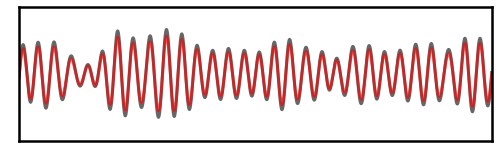

In [44]:
_, ax = plt.subplots(figsize=(8, 3))
plot_time_series(times, [sig_filt_x, sig_rot_filt_x], xlim=[1, 4], **plt_kwargs, ax=ax)
plt.xticks([]); plt.yticks([]);
savefig(SAVE_FIG, '03-ts_filt')

In [45]:
freqs1_x, powers1_x = trim_spectrum(*compute_spectrum(sig, fs, nperseg=fs), psd_range)
freqs2_x, powers2_x = trim_spectrum(*compute_spectrum(sig_rot_x, fs, nperseg=fs), psd_range)

/Users/tom/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


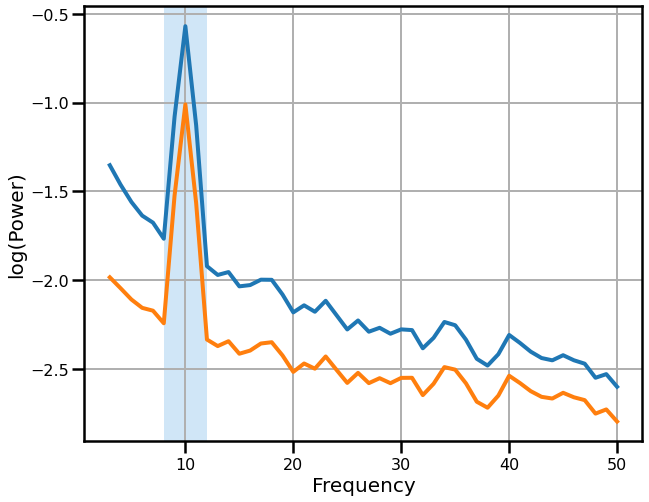

In [46]:
plot_spectra_shading(freqs1, [powers1_x, powers2_x], [8, 12],
                     log_freqs=False, log_powers=True,
                     lw=4, shade_colors=alpha_color)
savefig(SAVE_FIG, '03-psd')

In [47]:
fm.fit(freqs1_x, powers1_x, psd_range)
fm.aperiodic_params_[1]

0.9364141279093485

In [48]:
fm.fit(freqs1_x, powers2_x, psd_range)
fm.aperiodic_params_[1]

0.5827334413754863

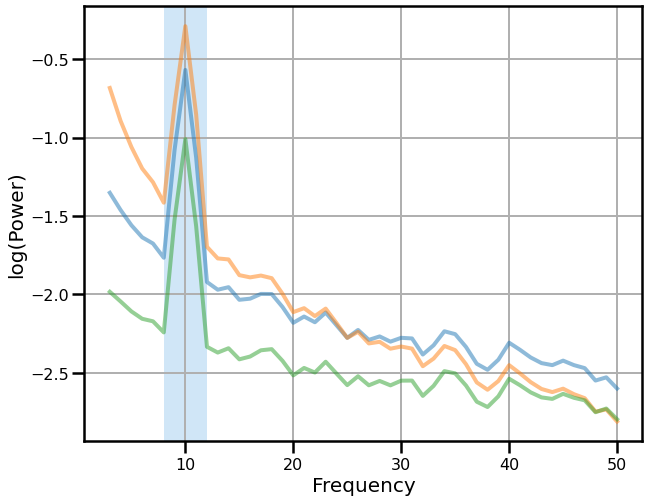

In [49]:
plot_spectra_shading(freqs1, [powers1, powers2, powers2_x], alpha_range,
                     log_freqs=False, log_powers=True, alpha=0.5,
                     lw=4, shade_colors=alpha_color)
savefig(SAVE_FIG, '03-psd')

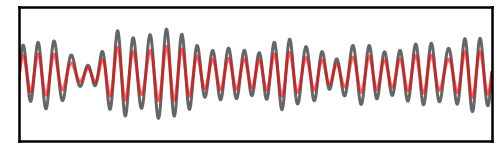

In [50]:
_, ax = plt.subplots(figsize=(8, 3))
plot_time_series(times, [sig_rot_filt, sig_rot_filt_x], xlim=[1, 4], **plt_kwargs, ax=ax)
plt.xticks([]); plt.yticks([]);

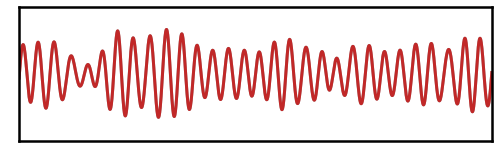

In [51]:
_, ax = plt.subplots(figsize=(8, 3))
plot_time_series(times, [sig_filt, sig_filt_x], xlim=[1, 4], **plt_kwargs, ax=ax)
plt.xticks([]); plt.yticks([]);

/Users/tom/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


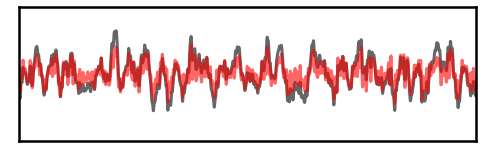

In [52]:
_, ax = plt.subplots(figsize=(8, 3))
plot_time_series(times, [sig_rot, sig_rot_x], xlim=[1, 4], **plt_kwargs, ax=ax)
plt.xticks([]); plt.yticks([]);

## RG version

In [53]:
FC = np.fft.fft(sig)
f_axis = np.fft.fftfreq(len(sig), 1./fs)

In [54]:
# Rotate fft with 1/f mask
f_rotation = 30.
f_exp = 0.5
f_mask = 10**(np.log10(np.abs(f_axis))*f_exp)

<ipython-input-54-fbd672bba077>:4: RuntimeWarning: divide by zero encountered in log10
  f_mask = 10**(np.log10(np.abs(f_axis))*f_exp)


In [55]:
f_mask[0] = 1.

In [56]:
f_mask = f_mask / f_mask[np.where(f_axis==f_rotation)]

In [57]:
# compute the steepened and flattened spectra
FC_steep = FC * f_mask
FC_flat = FC / f_mask

In [58]:
sig_rec = np.fft.ifft(FC)
sig_rec_steep = np.fft.ifft(FC_steep)
sig_rec_flat = np.fft.ifft(FC_flat)

# sig_rec = zscore(np.real(np.fft.ifft(FC)))
# sig_rec_steep = zscore(np.real(np.fft.ifft(FC_steep)))
# sig_rec_flat = zscore(np.real(np.fft.ifft(FC_flat)))

/Users/tom/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


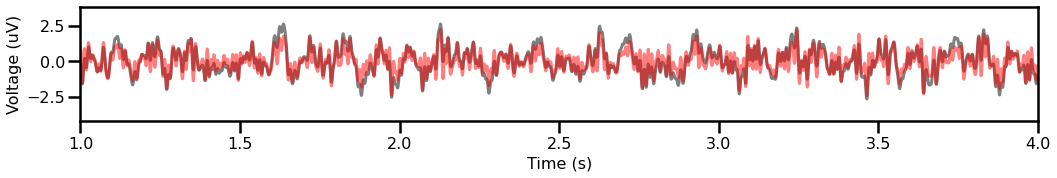

In [59]:
plot_time_series(times, [sig, sig_rec_steep], xlim=[1, 4], alpha=[0.5, 0.5])
#plt.savefig('figures/03-ts_full.pdf', bbox_inches='tight')

In [60]:
sig_filt = filter_signal(sig, fs, 'bandpass', alpha_range)
sig_rec_steep_filt = filter_signal(sig_rec_steep, fs, 'bandpass', alpha_range)
sig_rec_flat_filt = filter_signal(sig_rec_flat, fs, 'bandpass', alpha_range)

/Users/tom/opt/anaconda3/lib/python3.8/site-packages/neurodsp/utils/outliers.py:64: ComplexWarning: Casting complex values to real discards the imaginary part
  sig_restored[~sig_nans] = sig


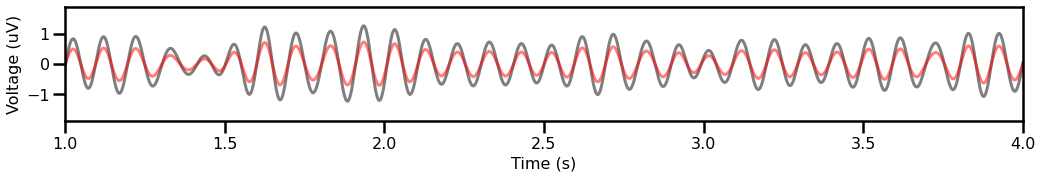

In [61]:
plot_time_series(times, [sig_filt, sig_rec_steep_filt],
                 xlim=[1, 4], alpha=[0.5, 0.5])
#plt.savefig('figures/03-ts_filt.pdf', bbox_inches='tight')

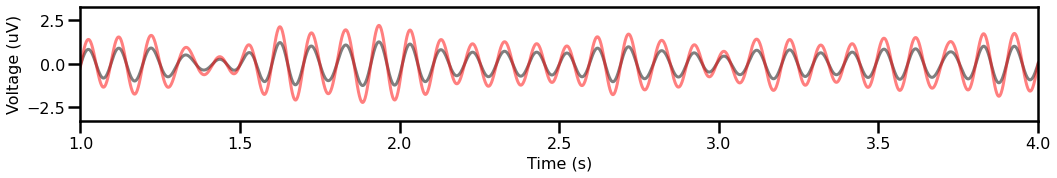

In [62]:
plot_time_series(times, [sig_filt, sig_rec_flat_filt],
                 xlim=[1, 4], alpha=[0.5, 0.5])
#plt.savefig('figures/03-ts_filt.pdf', bbox_inches='tight')

In [63]:
freqs0, powers0 = trim_spectrum(*compute_spectrum(sig, fs, nperseg=fs), psd_range)
freqs1, powers1 = trim_spectrum(*compute_spectrum(sig_rec, fs, nperseg=fs), psd_range)
freqs2, powers2 = trim_spectrum(*compute_spectrum(sig_rec_steep, fs, nperseg=fs), psd_range)
freqs3, powers3 = trim_spectrum(*compute_spectrum(sig_rec_flat, fs, nperseg=fs), psd_range)

/Users/tom/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


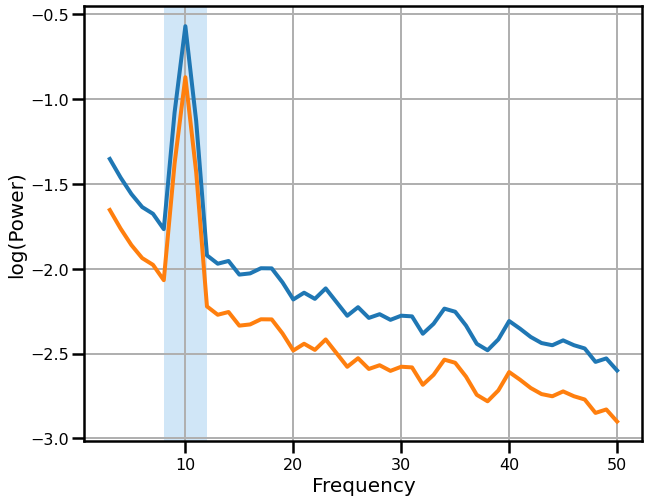

In [64]:
plot_spectra_shading(freqs1, [powers0, powers1], alpha_range,
                     log_freqs=False, log_powers=True,
                     lw=4, shade_colors=alpha_color)

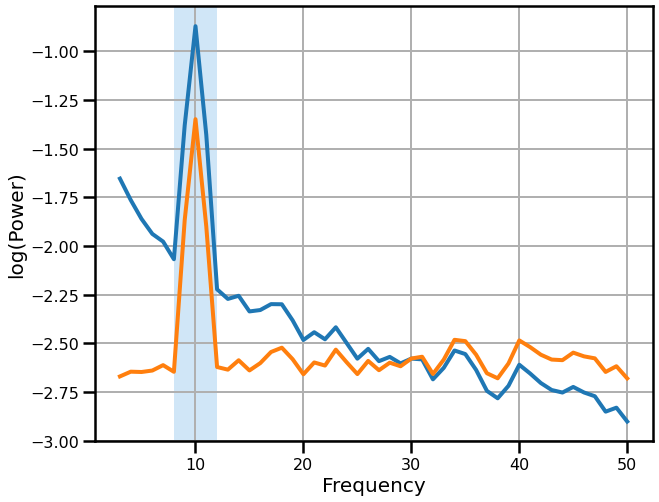

In [65]:
plot_spectra_shading(freqs1, [powers1, powers2], alpha_range,
                     log_freqs=False, log_powers=True,
                     lw=4, shade_colors=alpha_color)

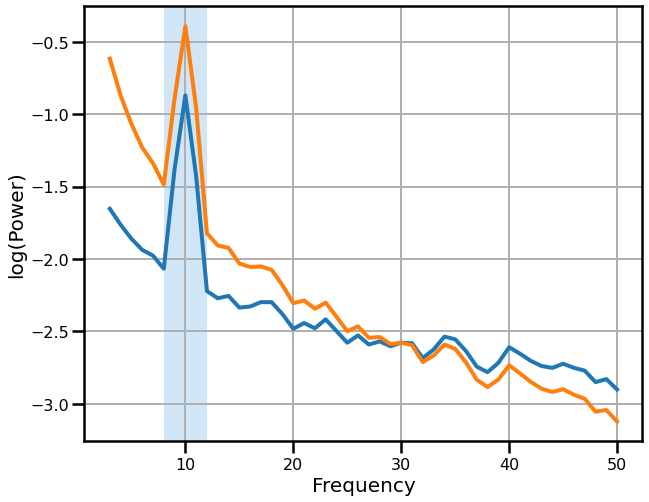

In [66]:
plot_spectra_shading(freqs1, [powers1, powers3], [8, 12],
                     log_freqs=False, log_powers=True,
                     lw=4, shade_colors=alpha_color)

In [67]:
fm.fit(freqs1, powers1, psd_range)
fm.aperiodic_params_[1]

0.9364141304240455

In [68]:
fm.fit(freqs2, powers2, psd_range)
fm.aperiodic_params_[1]

-0.07123366450349992

In [69]:
fm.fit(freqs3, powers3, psd_range)
fm.aperiodic_params_[1]

1.9530571617024501

## Signals without oscillations

Words, words, words.

In [70]:
# ...
sig_wn = sim_powerlaw(n_seconds, fs, exponent=-0.)
sig_pn = sim_powerlaw(n_seconds, fs, exponent=-1.)

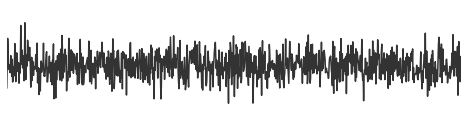

In [71]:
# Plot white noise
_, ax = plt.subplots(figsize=(8, 3))
plot_time_series(times, sig_wn, xlim=[4, 5], colors='black', alpha=0.8, lw=1.5, ax=ax)
plt.xticks([]); plt.yticks([]); plt.axis('off');
savefig(SAVE_FIG, '03-ts_white_noise')

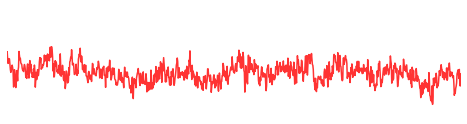

In [72]:
# Plot pink noise
_, ax = plt.subplots(figsize=(8, 3))
plot_time_series(times, sig_pn, xlim=[4, 5], colors='red', alpha=0.8, lw=1.5, ax=ax)
plt.xticks([]); plt.yticks([]); plt.axis('off');
savefig(SAVE_FIG, '03-ts_pink_noise')

In [73]:
plt_kwargs

{'alpha': [0.6, 0.6], 'xlabel': '', 'ylabel': ''}

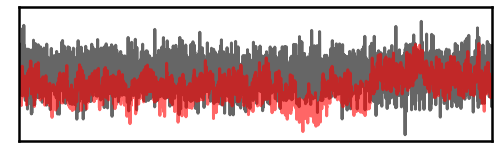

In [74]:
# ...
_, ax = plt.subplots(figsize=(8, 3))
plot_time_series(times, [sig_wn, sig_pn], xlim=[4, 8], **plt_kwargs, ax=ax)
plt.xticks([]); plt.yticks([]);
savefig(SAVE_FIG, '03-ts_noise')

In [75]:
# ...
freqs, powers_wn = trim_spectrum(*compute_spectrum(sig_wn, fs, nperseg=fs), psd_range)
freqs, powers_pn = trim_spectrum(*compute_spectrum(sig_pn, fs, nperseg=fs), psd_range)

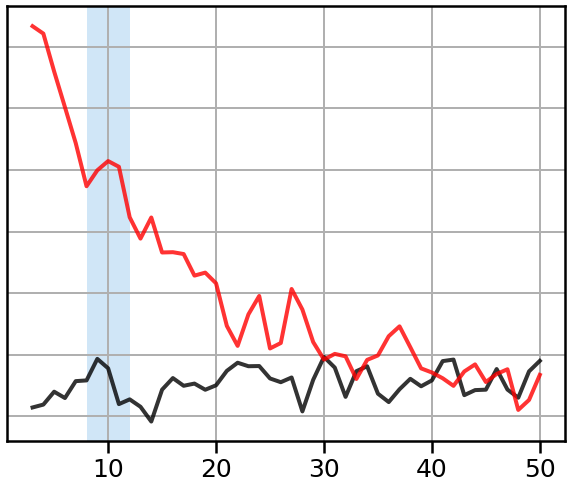

In [76]:
# ...
plot_spectra_shading(freqs1, [powers_wn, powers_pn], alpha_range,
                     log_freqs=False, log_powers=True,
                     lw=4, shade_colors=alpha_color)

# USE PSD STYLE HELPER FUNCTION

ax = plt.gca()
for line, color in zip(ax.get_lines(), colors):
    line.set_color(color)
    line.set_alpha(0.8)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(25)
    
ax.set_xlabel(''); ax.set_ylabel('');
for xlabel_i in ax.get_yticklabels():
    xlabel_i.set_visible(False)
    xlabel_i.set_fontsize(0.0)
for tic in ax.yaxis.get_major_ticks():
    tic.tick1line.set_visible(False)
    
savefig(SAVE_FIG, '03-psd_noise')

In [77]:
# ...
sig_filt_wn = filter_signal(sig_wn, fs, 'bandpass', alpha_range)
sig_filt_pn = filter_signal(sig_pn, fs, 'bandpass', alpha_range)

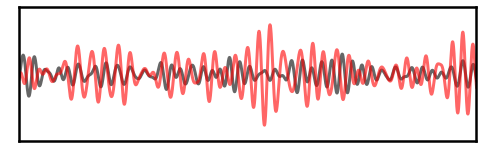

In [78]:
# ...
_, ax = plt.subplots(figsize=(8, 3))
plot_time_series(times, [sig_filt_wn, sig_filt_pn], 
                 xlim=[4, 8], **plt_kwargs, ax=ax)
plt.xticks([]); plt.yticks([]);
savefig(SAVE_FIG, '03-ts_noise_filt')

## Relative powers

In [80]:
# ...
comps1 = {'sim_powerlaw' : {'exponent' : -1, 'f_range' : ap_filt},
         'sim_oscillation' : {'freq' : cf}}
#comps2 = {'sim_powerlaw' : {'exponent' : -2.5, 'f_range' : ap_filt},
#         'sim_oscillation' : {'freq' : cf}}
sig1 = sim_combined(n_seconds, fs, comps1, comp_vars)
#sig2 = sim_combined(n_seconds, fs, comps1, comp_vars)

exp_rot = -0.5
f_rotation = 10
sig2 = rotate_sig(sig1, exp_rot, f_rotation)

In [81]:
nperseg = 1. * fs

In [82]:

freqs1_pl, powers1_pl = trim_spectrum(*compute_spectrum(sig1, fs, nperseg=nperseg), [2, 50])
freqs2_pl, powers2_pl = trim_spectrum(*compute_spectrum(sig2, fs, nperseg=nperseg), [2, 50])

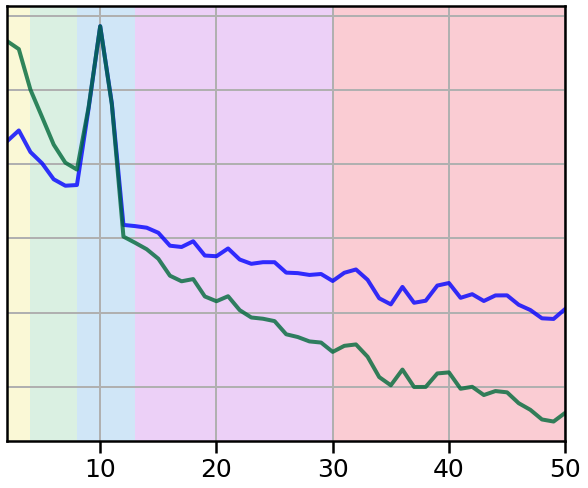

In [83]:
plot_spectra_shading(freqs1_pl, [powers1_pl, powers2_pl], 
                     bands.definitions, shade_cols,
                     lw=4, log_powers=True)

ax = plt.gca()
for line, color in zip(ax.get_lines(), colors2):
    line.set_color(color)
    line.set_alpha(0.8)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(25)
    
ax.set_xlabel(''); ax.set_ylabel('');
for xlabel_i in ax.get_yticklabels():
    xlabel_i.set_visible(False)
    xlabel_i.set_fontsize(0.0)
    
for tic in ax.yaxis.get_major_ticks():
    tic.tick1line.set_visible(False)
    
plt.xlim([2, 50])
savefig(SAVE_FIG, '03-psd_bands_rotation')

In [84]:
freqs1, powers1 = trim_spectrum(*compute_spectrum(sig1, fs), [2, 80])
freqs2, powers2 = trim_spectrum(*compute_spectrum(sig2, fs), [2, 80])

In [85]:
d_delta = compute_abs_power(freqs1, powers1, bands.delta) - \
    compute_abs_power(freqs2, powers2, bands.delta)

d_theta = compute_abs_power(freqs1, powers1, bands.theta) - \
    compute_abs_power(freqs2, powers2, bands.theta)

d_alpha = compute_abs_power(freqs1, powers1, bands.alpha) - \
    compute_abs_power(freqs2, powers2, bands.alpha)

d_beta = compute_abs_power(freqs1, powers1, bands.beta) - \
    compute_abs_power(freqs2, powers2, bands.beta)

d_gamma = compute_abs_power(freqs1, powers1, bands.gamma) - \
    compute_abs_power(freqs2, powers2, bands.gamma)

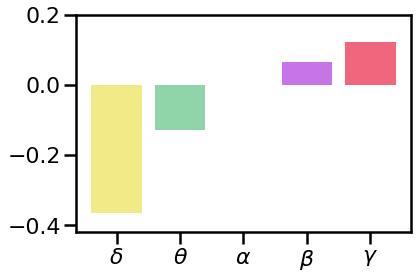

In [86]:
# MAKE IT"S OWN FUNCTION
labels = ['$\delta$', '$\\theta$', r'$\alpha$', r'$\beta$', r'$\gamma$']

plt.bar([0, 1, 2, 3, 4], [d_delta, d_theta, d_alpha, d_beta, d_gamma],
        tick_label=labels, color=shade_cols, alpha=0.6)
plt.ylim([-0.42, 0.2]);
savefig(SAVE_FIG, '03-bands_changes')

In [87]:
full_range = [2, 50]

In [88]:
# Compute absolute power of alpha
abs1 = compute_abs_power(freqs1, powers1, alpha_range)
abs2 = compute_abs_power(freqs2, powers2, alpha_range)
print(abs1, abs2)

0.4598338897063995 0.4640061731213188


In [89]:
# Compute relative power of alpha
rel1 = compute_rel_power(freqs1, powers1, alpha_range, norm_range=full_range)
rel2 = compute_rel_power(freqs2, powers2, alpha_range, norm_range=full_range)
print(rel1, rel2)

50.99458535519885 38.57049575701213


In [90]:
# Compute total power
tot1 = compute_abs_power(freqs1, powers1, full_range)
tot2 = compute_abs_power(freqs2, powers2, full_range)
print(abs1, abs2)

0.4598338897063995 0.4640061731213188


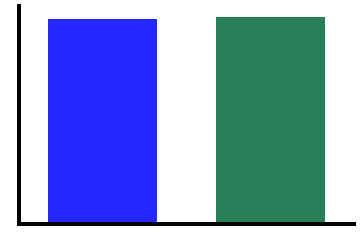

In [97]:
# Plot the absolute power of alpha
plot_bar(abs1, abs2, color=colors2, alpha=0.85)
savefig(SAVE_FIG, '03-pow_abs_alpha')

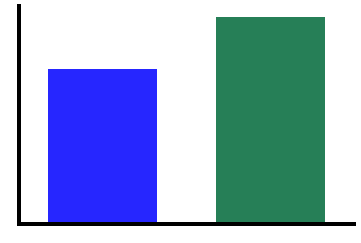

In [98]:
# Plot the total power
plot_bar(tot1, tot2, color=colors2, alpha=0.85)
savefig(SAVE_FIG, '03-pow_tot')

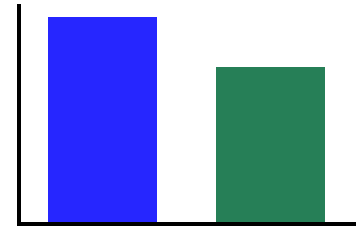

In [99]:
# Plot the relative power of alpha
plot_bar(rel1, rel2, color=colors2, alpha=0.85)
savefig(SAVE_FIG, '03-pow_rel_alphs')

## Conclusion

Word, words, words.